In [806]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


sns.set_theme()  
%matplotlib inline

# Dati

In [807]:
df = pd.read_csv('./Lezioni.csv')

In [808]:
#df = df[df['Lezione'] == ' C123']

In [809]:
#df = df[(df['Index'] >= 100) & (df['Index'] <= 154)]

In [810]:
righe, colonne = df.shape

In [811]:
def guia(data_frame):
    linhas, qnt_colunas = data_frame.shape
    sequencia = list(range(qnt_colunas + 1))
    sequencia = sequencia[1:]

    colunas = data_frame.columns.to_list()
    lista_tipos = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorias = [data_frame[col].nunique() for col in data_frame.columns]

    elementos_nulos = data_frame.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentual_dados_nulos = round((data_frame.isnull().sum() / linhas) * 100)
    percentual_dados_nulos = percentual_dados_nulos.to_list()

    dados = pd.DataFrame({'Nome': colunas, 
                          'Tipo': lista_tipos, 
                          'qnt_categorias': lista_categorias,
                          'Dados nulos' : elementos_nulos,
                          'Dados nulos %' : percentual_dados_nulos}, index=sequencia)
    
    # Cabeçalhos
    print('Tabela Exploratória')
    print(f'Nesses dados temos {linhas} linhas e {qnt_colunas} colunas.')
    
    return dados

#guia_df = guia(df)
#guia_df.head()

In [812]:
df = df.drop('Unnamed: 0', axis=1)

# Tabella

In [813]:
df.head()

,Index,Data,Ora,Professorassa,Livello,Lezione,Giorno della settimana,Mese,Anno
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
18,19,2023-06-10,11,Irene,C1,C123,Sabato,Giugno,2023
33,34,2023-06-13,10,Graziana,C1,C123,Martedì,Giugno,2023
102,103,2023-08-29,10,Sara,C1,C123,Martedì,Agosto,2023
127,128,2023-09-28,11,Francesca 2,C1,C123,Giovedì,Settembre,2023


In [814]:
def data_finiziale_finale(dat_frame, dfi):
    if dfi == 0:
        dt_iniziale = dat_frame.head(1)
        dt_iniziale = dt_iniziale[' Data'].to_list()
        dt_iniziale = dt_iniziale[0]
        
        return dt_iniziale
    
    elif dfi == 1:
        dt_finale = dat_frame.tail(1)
        dt_finale = dt_finale[' Data'].to_list()
        dt_finale = dt_finale[0]

        return dt_finale

# Durata

In [815]:
# Definisci le date

data1 = datetime.strptime(data_finiziale_finale(df, 0), '%Y-%m-%d')
data2 = datetime.strptime(data_finiziale_finale(df, 1), '%Y-%m-%d')

# Calcola la differenza tra le date
diff = data2 - data1

print(f"Il numero di giorni tra il {data_finiziale_finale(df, 0)} e il {data_finiziale_finale(df, 1)} è {diff.days}.")

Il numero di giorni tra il 2023-05-23 e il 2023-12-08 è 199.


In [816]:
df_categoricos = df.select_dtypes('object')
df_categoricos

,Data,Professorassa,Livello,Lezione,Giorno della settimana,Mese
2,2023-05-23,Francesca,C1,C123,Martedì,Maggio
18,2023-06-10,Irene,C1,C123,Sabato,Giugno
33,2023-06-13,Graziana,C1,C123,Martedì,Giugno
102,2023-08-29,Sara,C1,C123,Martedì,Agosto
127,2023-09-28,Francesca 2,C1,C123,Giovedì,Settembre
137,2023-10-06,Daniela,C1,C123,Venerdì,Ottobre
176,2023-11-30,Chiara,C1,C123,Giovedì,Novembre
183,2023-12-08,Federica,C1,C123,Venerdì,Dicembre


In [817]:
df_categoricos.describe().transpose() # freq / count = %

,count,unique,top,freq
Data,8,8,2023-05-23,1
Professorassa,8,8,Francesca,1
Livello,8,1,C1,8
Lezione,8,1,C123,8
Giorno della settimana,8,4,Martedì,3
Mese,8,7,Giugno,2


In [818]:
df_numericos = df.select_dtypes('number')
df_numericos.drop('Index', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ora,8.0,9.5,1.414214,7.0,8.75,10.0,10.25,11.0
Anno,8.0,2023.0,0.000000,2023.0,2023.00,2023.0,2023.00,2023.0


In [819]:
189 / 219

0.863013698630137

In [820]:
df.columns

Index(['Index', ' Data', 'Ora', ' Professorassa', 'Livello', 'Lezione',
       'Giorno della settimana', 'Mese', 'Anno'],
      dtype='object')

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

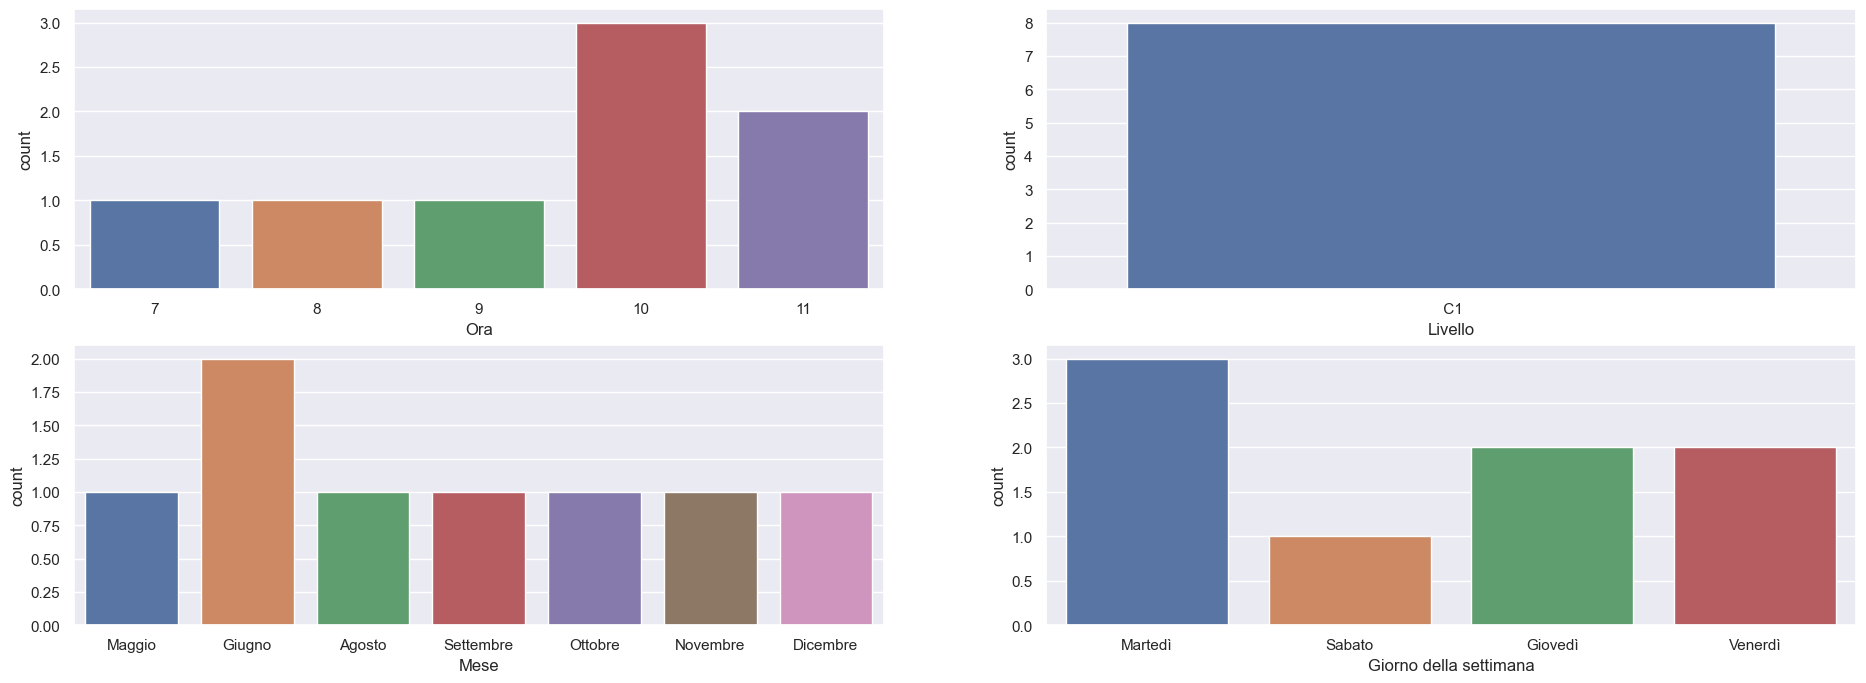

In [821]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='Ora', data=df)
sns.countplot(ax = axes[0, 1], x='Livello', data=df)
sns.countplot(ax = axes[1, 0], x='Mese', data=df)
sns.countplot(ax = axes[1, 1], x='Giorno della settimana', data=df)

plt.savefig('Grafici')

# Grafici

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


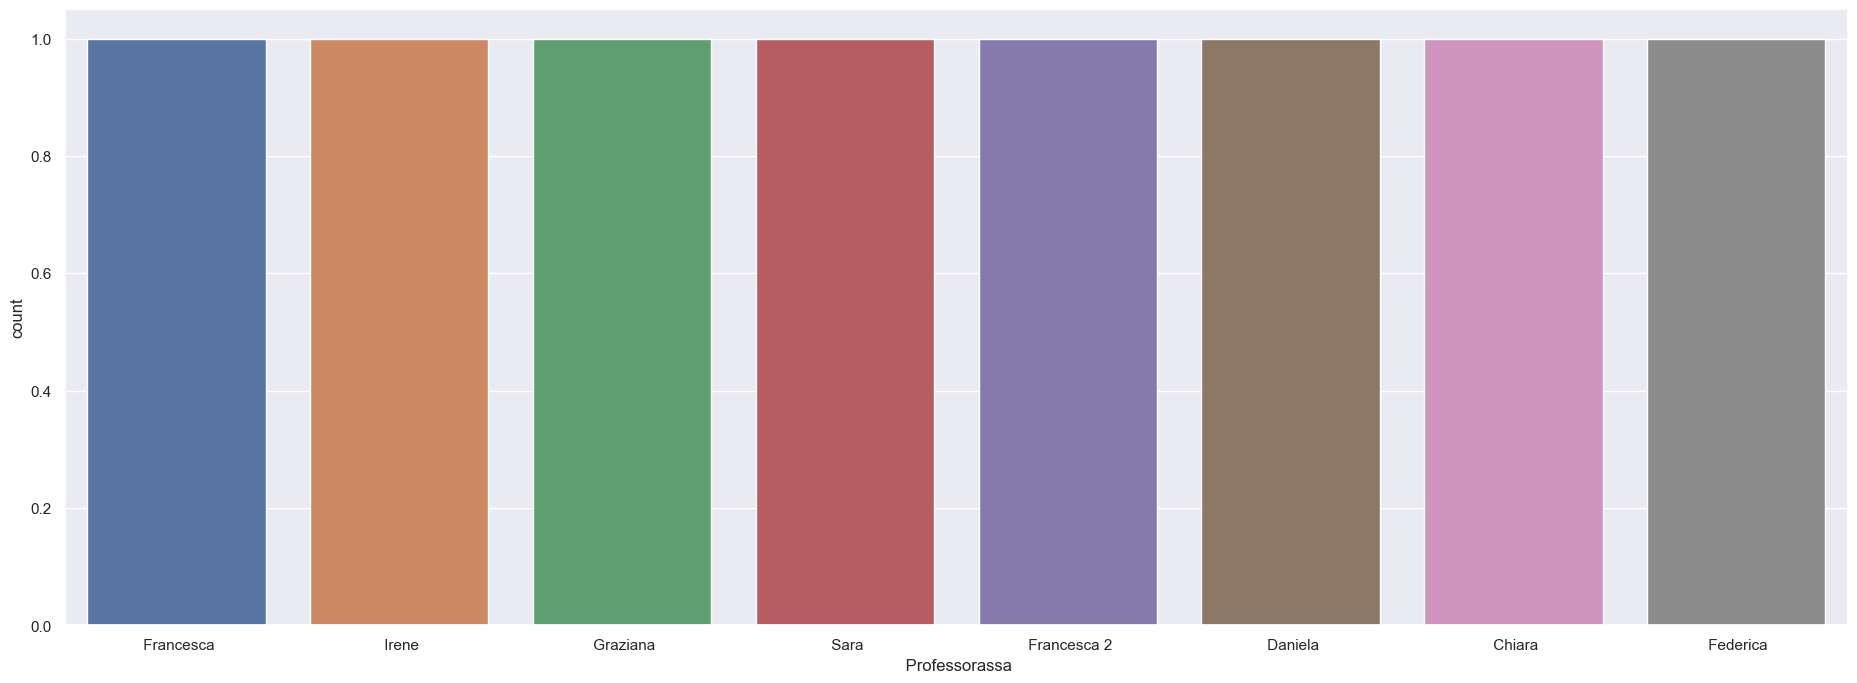

In [822]:
numero_di_barre = 15
sns.countplot(x=' Professorassa', data=df, order=df[' Professorassa'].value_counts().iloc[:numero_di_barre].index)
plt.savefig('Insegnanti')

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel=' Professorassa', ylabel='count'>

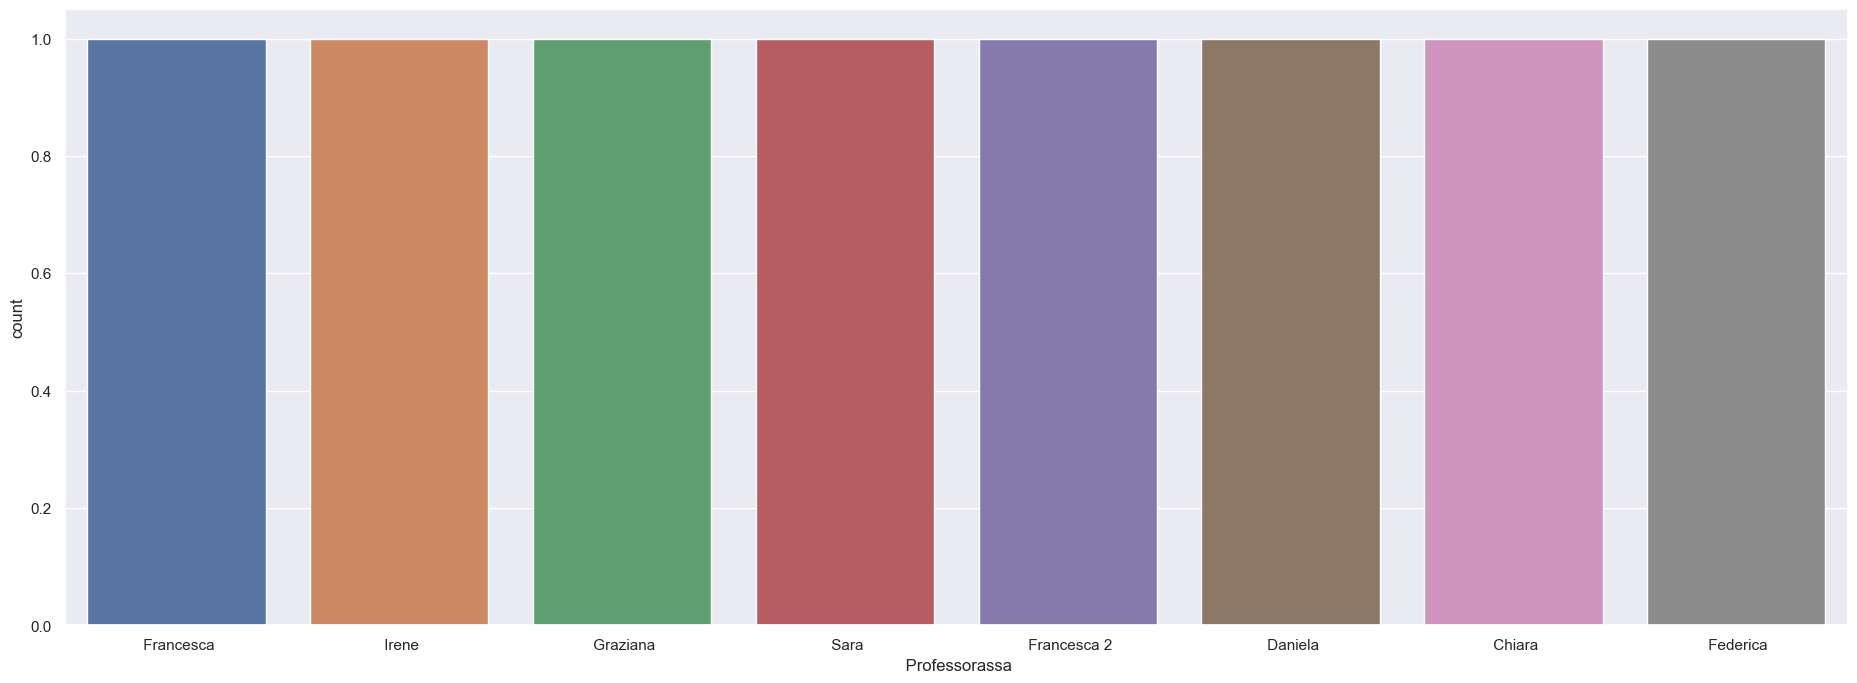

In [823]:
sns.countplot(x=' Professorassa', data=df, order=df[' Professorassa'].value_counts().sort_values(ascending=True).iloc[:15].index)

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


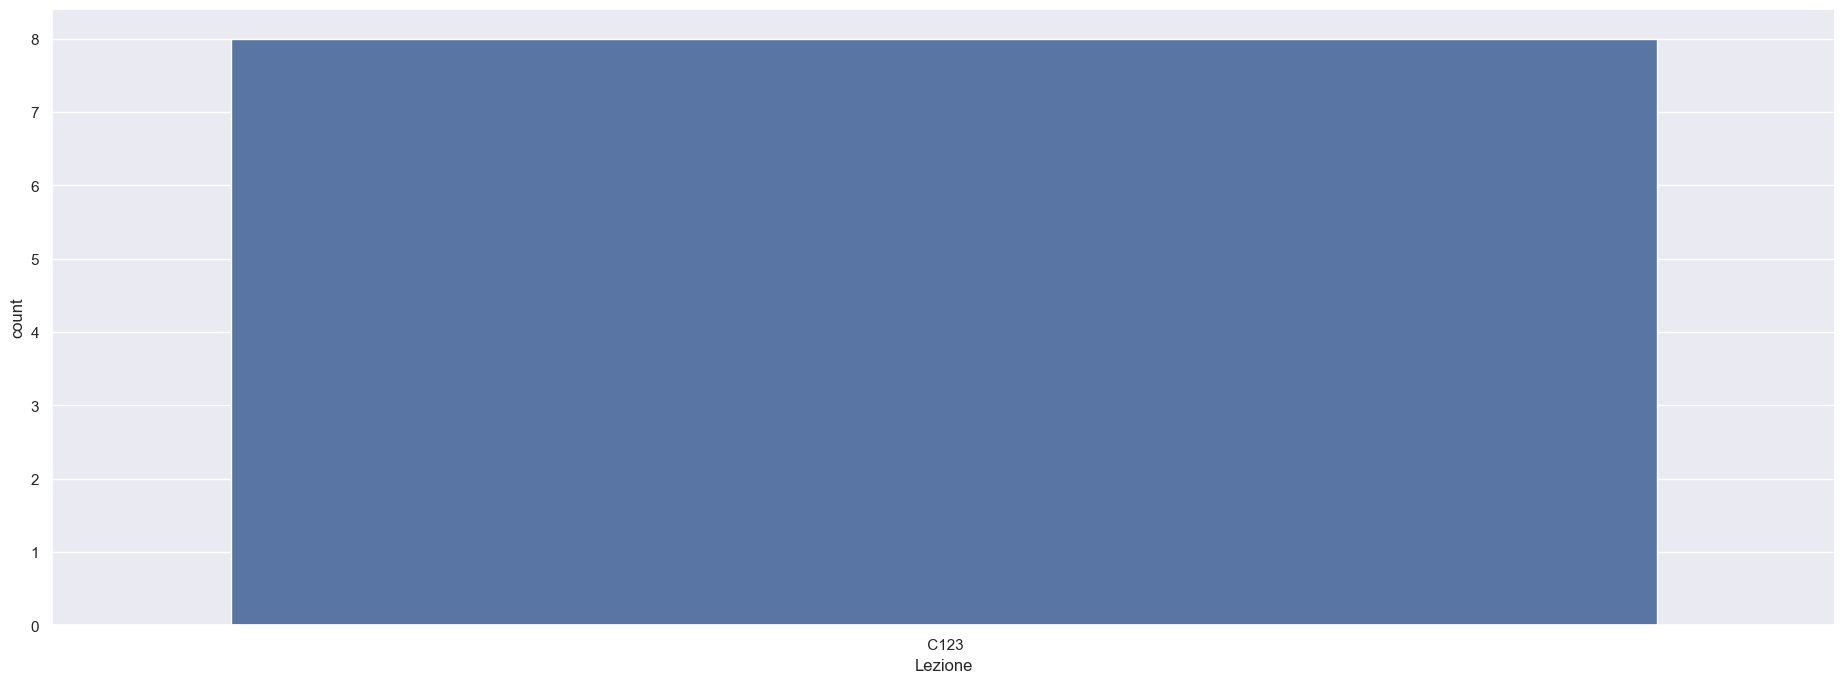

In [824]:
numero_di_barre = 15
sns.countplot(x='Lezione', data=df, order=df['Lezione'].value_counts().iloc[:numero_di_barre].index)
plt.savefig('Lezioni più frequenti')

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


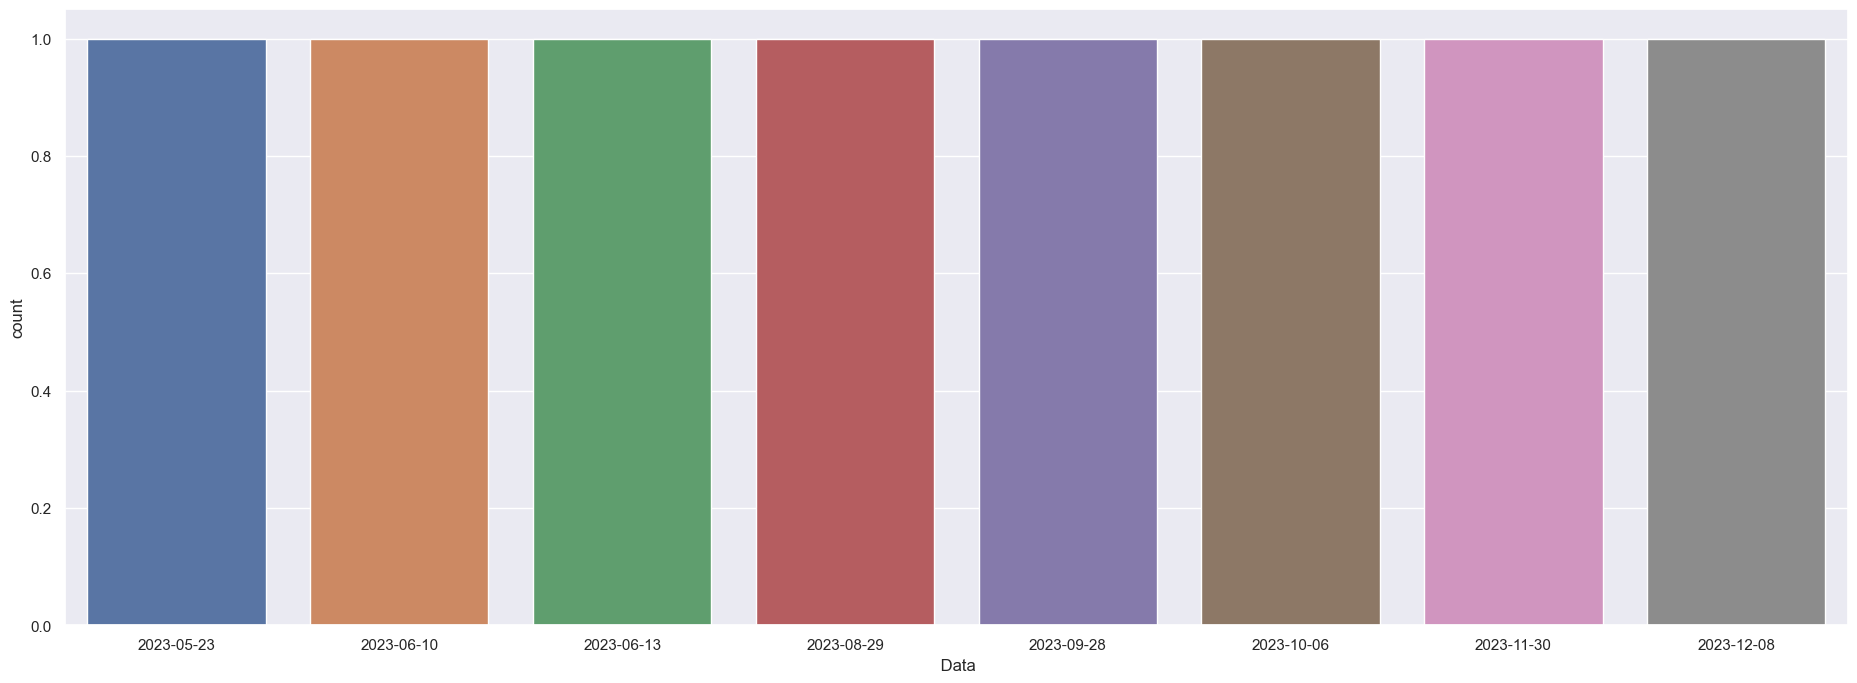

In [825]:
numero_di_barre = 15
sns.countplot(x=' Data', data=df, order=df[' Data'].value_counts().iloc[:numero_di_barre].index)
plt.savefig('Immersioni')

# Fine

In [826]:
#df.groupby(['Mese', 'Livello'])['Index'].count().unstack().plot(figsize=[15,5]);